In [5]:
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime
from pytrends.request import TrendReq
%matplotlib inline

### Now TEXT BLOB

In [3]:
import pandas as pd
df2 = pd.read_csv('LatestReddit/THIS/DONE/ETH/df_mega_eth.csv')

In [4]:
import datetime
import time

In [5]:
int_time = [int(item) for item in df2['timestamp']]

In [6]:
df2['timestamp'] = [datetime.datetime.fromtimestamp(item) for item in int_time]

In [7]:
from textblob import TextBlob

In [8]:
df2 = df2[df2.text.str.contains("[deleted]") == False]

In [9]:
df2['text'] = [str(item) for item in df2['text']]

In [10]:
textblob_objects = [TextBlob(item) for item in df2['text']]

In [11]:
sent_polarity = [item.sentiment.polarity for item in textblob_objects]

In [12]:
sent_subjectivity = [item.sentiment.polarity for item in textblob_objects]

In [13]:
df2['sent polarity'] = sent_polarity
df2['sent subjectivity'] = sent_subjectivity

In [14]:
df2['sent polarity'] =  df2['sent polarity'] +0.9765625+0.0234375
df2['sent subjectivity']= df2['sent subjectivity']+0.9765625+0.0234375

In [15]:
#df2['sent label'] = ['pos' if item > 1.05 else 'neg' if item < 0.96 else 'neu' for item in df2['sent polarity']]

In [16]:
df2['sent label'] = ['pos' if item > 1.05 else 'neg' for item in df2['sent polarity']]

In [17]:
df2['sent polarity'].median()

1.0

In [18]:
df2['sent polarity'].mean()

1.059047928320982

In [19]:
df2['sent polarity'].min()

0.0

In [20]:
df2

,Unnamed: 0,doc_id,doc_type,resp_to,text,timestamp,sent polarity,sent subjectivity,sent label
30,30,7d7sq8,slc_comment,Upvoting this so it gets more attention. I hop...,Thank you,2017-11-16 09:36:47,1.000000,1.000000,neg
128,128,7d7sq8,comment,NaN,Thank you,2017-11-16 09:36:47,1.000000,1.000000,neg
166,166,7d7sq8,slc_comment,Thanks - got wind of the situation this mornin...,ENABLE MULTI-FACTOR AUTHENTICATION PLEASE.,2017-11-16 18:17:31,1.000000,1.000000,neg
180,180,7d7sq8,slc_comment,"Because it can generally mean ""departing"" whic...","### EXODUS 20:15 ""**THOU SHALT NOT STEAL**""",2017-11-16 20:46:00,1.000000,1.000000,neg
187,187,7d7sq8,slc_comment,you mentioned you took a shower. anyone in the...,No haha,2017-11-16 06:48:36,0.900000,0.900000,neg
250,250,7d7sq8,comment,NaN,ENABLE MULTI-FACTOR AUTHENTICATION PLEASE.,2017-11-16 18:17:31,1.000000,1.000000,neg
262,262,7d7sq8,comment,NaN,"### EXODUS 20:15 ""**THOU SHALT NOT STEAL**""",2017-11-16 20:46:00,1.000000,1.000000,neg
266,266,7d7sq8,comment,NaN,No haha,2017-11-16 06:48:36,0.900000,0.900000,neg
267,267,7d7sq8,slc_comment,No haha,Xanax?,2017-11-16 07:08:05,1.000000,1.000000,neg
324,324,7d7sq8,comment,NaN,Xanax?,2017-11-16 07:08:05,1.000000,1.000000,neg


In [21]:
df2 = df2.set_index(df2['timestamp'])

In [22]:
df_mean = df2.groupby(df2['timestamp'].dt.normalize()).mean() #.dt.normalize()) hmmmm

In [23]:
df_mean['sent polarity'].min()

0.8846153846153846

In [24]:
list1 = df_mean['sent polarity'].loc['2017-11-15':'2018-03-21']
df_mean['sent polarity'].max()
mean_list_norm = list1/(df_mean['sent polarity'].max())



### NOW some machine learning models

#### prepping data

In [28]:
df2.head()

,Unnamed: 0,doc_id,doc_type,resp_to,text,timestamp,sent polarity,sent subjectivity,sent label
timestamp,,,,,,,,,
2017-11-16 09:36:47,30,7d7sq8,slc_comment,Upvoting this so it gets more attention. I hop...,Thank you,2017-11-16 09:36:47,1.0,1.0,neg
2017-11-16 09:36:47,128,7d7sq8,comment,NaN,Thank you,2017-11-16 09:36:47,1.0,1.0,neg
2017-11-16 18:17:31,166,7d7sq8,slc_comment,Thanks - got wind of the situation this mornin...,ENABLE MULTI-FACTOR AUTHENTICATION PLEASE.,2017-11-16 18:17:31,1.0,1.0,neg
2017-11-16 20:46:00,180,7d7sq8,slc_comment,"Because it can generally mean ""departing"" whic...","### EXODUS 20:15 ""**THOU SHALT NOT STEAL**""",2017-11-16 20:46:00,1.0,1.0,neg
2017-11-16 06:48:36,187,7d7sq8,slc_comment,you mentioned you took a shower. anyone in the...,No haha,2017-11-16 06:48:36,0.9,0.9,neg


In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Alexandra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import numpy as np
import spacy
import text_normalizer as tn
from contractions import CONTRACTION_MAP #had to configure contraction map and had to download english module

In [31]:
# take a peek at the data
#print(df2.head())
reviews = np.array(df2['text'])
sentiments = np.array(df2['sent label'])

# build train and test datasets
train_reviews = reviews[:1699]
train_sentiments = sentiments[:1699]
test_reviews = reviews[1699:]
test_sentiments = sentiments[1699:]

# normalize datasets
norm_train_reviews = tn.normalize_corpus(train_reviews)
norm_test_reviews = tn.normalize_corpus(test_reviews)

/Users/Alexandra/anaconda/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/Alexandra/anaconda/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


### feature engineering

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [53]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

/Users/Alexandra/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [54]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (1699, 903)  Test features shape: (1699, 903)
TFIDF model:> Train features shape: (1699, 903)  Test features shape: (1699, 903)


### training 

In [55]:
import model_evaluation_utils as meu
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', n_iter=100)

In [56]:
# Logistic Regression model on BOW features
lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['pos', 'neg'])

Model Performance metrics:
------------------------------
Accuracy: 0.9105
Precision: 0.907
Recall: 0.9105
F1 Score: 0.9065

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        pos       0.83      0.66      0.74       323
        neg       0.92      0.97      0.95      1376

avg / total       0.91      0.91      0.91      1699


Prediction Confusion Matrix:
------------------------------
            Predicted:      
                   pos   neg
Actual: pos        214   109
        neg         43  1333


### Newer supervised deep learning models

In [57]:

import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

#import requirements
import tensorflow

/Users/Alexandra/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [58]:
le = LabelEncoder()
num_classes=3
# tokenize train reviews & encode train labels
tokenized_train = [tn.tokenizer.tokenize(text)
                   for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize test reviews & encode test labels
tokenized_test = [tn.tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [59]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], 
      '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'neg': 0, 'pos': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['pos' 'pos' 'pos'] 
Encoded Labels: [1 1 1] 
One hot encoded Labels:
 [[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [60]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3)

In [61]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [62]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=500)

/Users/Alexandra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [63]:

# feature engineering with GloVe model
train_nlp = [tn.nlp(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [tn.nlp(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [64]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (1699, 500)  Test features shape: (1699, 500)
GloVe model:> Train features shape: (1699,)  Test features shape: (1699,)


### deep nn modeling

In [113]:
from keras import backend as K
K.clear_session()

def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2,activation='softmax')) #SPMETHING WITH THIS LINE!!!


    dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

https://github.com/keras-team/keras/issues/7339 this has a good resource

In [114]:
w2v_dnn = construct_deepnn_architecture(num_input_features=500)

### can't do the visualizations sample deep architecture

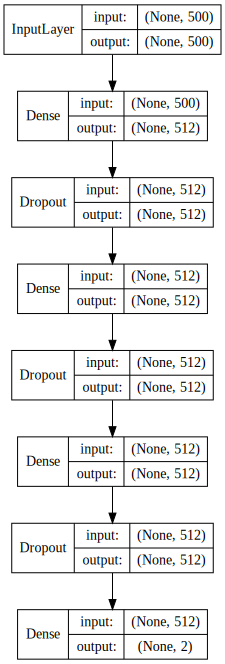

In [115]:
import pydot
import graphviz

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

### model training Prediction and Performance Evaluation

In [112]:
batch_size = 100
print(y_train)
#y=keras.utils.to_categorical(y_train, num_classes=1)
#print(y)

w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


ValueError: Error when checking target: expected dense_4 to have shape (1,) but got array with shape (3,)